In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.express as px
import pickle
import statistics

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier, StackingClassifier
from xgboost import XGBClassifier, XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, f1_score, ConfusionMatrixDisplay, r2_score, mean_absolute_error, mean_squared_error

In [3]:
movies = pd.read_csv('Movie_model.csv')
casts = pd.read_csv('Cast.csv')

In [4]:
movies.head(5)

,url,title,on_streaming_date,genre,certification,runtime,rating,content,Director,Director_id,...,cast1_id,cast2,cast2_id,cast3,cast3_id,Status,Original Language,Budget,Revenue,keyword
0,https://www.themoviedb.org//movie/10851,Revolver,2005-09-22,"Drama, Thriller, Crime, Mystery",15,111,64.0,Your mind will not accept a game this big.\nHo...,Guy Ritchie,956,...,976,Ray Liotta,11477,Vincent Pastore,47774,Released,English,27000000.0,7164778.0,"cash,wrong diagnosis,foretelling,shaky camera ..."
1,https://www.themoviedb.org//movie/10759,The Comebacks,2007-10-19,Comedy,PG-13,107,49.0,Keep your eye on the ball.\nOut-of-luck coach ...,Tom Brady,66512,...,1101,David Koechner,28638,Melora Hardin,404,Released,English,15000000.0,13500000.0,"baseball,baseball bat,sports,coach"
2,https://www.themoviedb.org//movie/78698,Big Miracle,2012-02-10,"Adventure, Drama, Romance",PG,107,66.0,A family of whales trapped beneath the ice. On...,Ken Kwapis,29009,...,69597,John Krasinski,17697,Kristen Bell,40462,Released,English,40000000.0,24719215.0,"whale,based on true story,alaska,reporter,afte..."
3,https://www.themoviedb.org//movie/9275,Death to Smoochy,2002-03-29,"Comedy, Crime, Drama, Thriller",R,109,59.0,Get ready for an unexpected hit.\nTells the st...,Danny DeVito,518,...,2157,Edward Norton,819,Catherine Keener,2229,Released,English,55000000.0,8382938.0,"corruption,success,irish mob,duringcreditsstin..."
4,https://www.themoviedb.org//movie/7350,The Bucket List,2007-12-25,"Drama, Comedy",PG-13,97,72.0,Find the joy.\nCorporate billionaire Edward Co...,Rob Reiner,3026,...,514,Morgan Freeman,192,Sean Hayes,52601,Released,English,45000000.0,175372502.0,"africa,himalaya mountain range,brain tumor,par..."


In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3438 entries, 0 to 3437
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   url                3438 non-null   object 
 1   title              3438 non-null   object 
 2   on_streaming_date  3438 non-null   object 
 3   genre              3438 non-null   object 
 4   certification      3438 non-null   object 
 5   runtime            3438 non-null   int64  
 6   rating             3438 non-null   float64
 7   content            3438 non-null   object 
 8   Director           3438 non-null   object 
 9   Director_id        3438 non-null   int64  
 10  cast1              3438 non-null   object 
 11  cast1_id           3438 non-null   int64  
 12  cast2              3438 non-null   object 
 13  cast2_id           3438 non-null   int64  
 14  cast3              3438 non-null   object 
 15  cast3_id           3438 non-null   int64  
 16  Status             3438 

In [6]:
movies['id'] = movies['url'].str.extractall('(\d+)').groupby(level=0)[0].apply(''.join)

In [7]:
movies['on_streaming_date'] = pd.to_datetime(movies['on_streaming_date'])
movies['on_streaming_month'] =movies['on_streaming_date'].dt.month
movies['on_streaming_year'] =movies['on_streaming_date'].dt.year
movies['on_streaming_day'] =movies['on_streaming_date'].dt.day
movies.head(5)

,url,title,on_streaming_date,genre,certification,runtime,rating,content,Director,Director_id,...,cast3_id,Status,Original Language,Budget,Revenue,keyword,id,on_streaming_month,on_streaming_year,on_streaming_day
0,https://www.themoviedb.org//movie/10851,Revolver,2005-09-22,"Drama, Thriller, Crime, Mystery",15,111,64.0,Your mind will not accept a game this big.\nHo...,Guy Ritchie,956,...,47774,Released,English,27000000.0,7164778.0,"cash,wrong diagnosis,foretelling,shaky camera ...",10851,9,2005,22
1,https://www.themoviedb.org//movie/10759,The Comebacks,2007-10-19,Comedy,PG-13,107,49.0,Keep your eye on the ball.\nOut-of-luck coach ...,Tom Brady,66512,...,404,Released,English,15000000.0,13500000.0,"baseball,baseball bat,sports,coach",10759,10,2007,19
2,https://www.themoviedb.org//movie/78698,Big Miracle,2012-02-10,"Adventure, Drama, Romance",PG,107,66.0,A family of whales trapped beneath the ice. On...,Ken Kwapis,29009,...,40462,Released,English,40000000.0,24719215.0,"whale,based on true story,alaska,reporter,afte...",78698,2,2012,10
3,https://www.themoviedb.org//movie/9275,Death to Smoochy,2002-03-29,"Comedy, Crime, Drama, Thriller",R,109,59.0,Get ready for an unexpected hit.\nTells the st...,Danny DeVito,518,...,2229,Released,English,55000000.0,8382938.0,"corruption,success,irish mob,duringcreditsstin...",9275,3,2002,29
4,https://www.themoviedb.org//movie/7350,The Bucket List,2007-12-25,"Drama, Comedy",PG-13,97,72.0,Find the joy.\nCorporate billionaire Edward Co...,Rob Reiner,3026,...,52601,Released,English,45000000.0,175372502.0,"africa,himalaya mountain range,brain tumor,par...",7350,12,2007,25


In [8]:
casts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5672 entries, 0 to 5671
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   url              5672 non-null   object
 1   title            5672 non-null   object
 2   biography        5672 non-null   object
 3   domestic_movie   5672 non-null   object
 4   number_domestic  5672 non-null   int64 
 5   launch_year      5672 non-null   object
 6   Known For        5672 non-null   object
 7   Known Credits    5672 non-null   int64 
 8   Gender           5672 non-null   object
 9   Birthday         5672 non-null   object
 10  Place of Birth   5672 non-null   object
 11  Day of Death     196 non-null    object
 12  Adult Actor      4 non-null      object
 13  id               5672 non-null   int64 
dtypes: int64(3), object(11)
memory usage: 620.5+ KB


In [9]:
casts.head(5)

,url,title,biography,domestic_movie,number_domestic,launch_year,Known For,Known Credits,Gender,Birthday,Place of Birth,Day of Death,Adult Actor,id
0,https://www.themoviedb.org//person/995462-greg...,Gregory Plotkin,Gregory Plotkin is a film editor best known fo...,"Get Out, Happy Death Day, Game Night, The Brea...",8,1995,Editing,28,Male,-,-,NaN,NaN,995462
1,https://www.themoviedb.org//person/1719706-aar...,Aaron Horvath,We don't have a biography for Aaron Horvath.,Teen Titans Go! To the Movies,4,2013,Writing,6,Male,1980-08-19 (43 years old),"California, USA",NaN,NaN,1719706
2,https://www.themoviedb.org//person/82987-candy...,Candy Ford,"From Wikipedia, the free encyclopedia Candy Fo...","The Country Bears, Curb Your Enthusiasm, Will ...",6,1998,Acting,6,Female,1971-05-01 (52 years old),"Los Angeles, California, USA",NaN,NaN,82987
3,https://www.themoviedb.org//person/98521-flori...,Floria Sigismondi,​Canadian photographer and director Floria Sig...,"Marvel's Daredevil, The Handmaid's Tale, Ameri...",8,1999,Directing,16,Female,1965-01-01 (58 years old),"Pescara, Italy",NaN,NaN,98521
4,https://www.themoviedb.org//person/7404-sarah-...,Sarah Silverman,"Sarah Kate Silverman (born December 1, 1970) i...","Wreck-It Ralph, Ralph Breaks the Internet, Sch...",8,1975,Acting,179,Female,1970-12-01 (52 years old),"Bedford, New Hampshire, USA",NaN,NaN,7404


In [10]:
def cast(df,df1,col):
    df = df.merge(df1[['number_domestic','Known Credits','id']], left_on=col, right_on='id')
    df = df.drop('id_y', axis=1)
    df = df.rename(columns={'number_domestic': col[:-2] + 'number_domestic','Known Credits': col[:-2]+'known_credits','id_x': 'id'})
    return df
movies = cast(movies,casts,'Director_id')
movies = cast(movies,casts,'cast1_id')
movies = cast(movies,casts,'cast2_id')
movies = cast(movies,casts,'cast3_id')
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3438 entries, 0 to 3437
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   url                       3438 non-null   object        
 1   title                     3438 non-null   object        
 2   on_streaming_date         3438 non-null   datetime64[ns]
 3   genre                     3438 non-null   object        
 4   certification             3438 non-null   object        
 5   runtime                   3438 non-null   int64         
 6   rating                    3438 non-null   float64       
 7   content                   3438 non-null   object        
 8   Director                  3438 non-null   object        
 9   Director_id               3438 non-null   int64         
 10  cast1                     3438 non-null   object        
 11  cast1_id                  3438 non-null   int64         
 12  cast2               

In [11]:
movies['TL'] = movies['genre'].str.split(', ')
dummy_df = pd.get_dummies(movies['TL'].apply(pd.Series).stack()).sum(level=0)
movies = pd.concat([movies, dummy_df], axis=1)
movies = pd.get_dummies(movies, columns=['Original Language'])
movies.head(5)

C:\Users\ntthu\AppData\Local\Temp\ipykernel_1824\2402940123.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  dummy_df = pd.get_dummies(movies['TL'].apply(pd.Series).stack()).sum(level=0)


,url,title,on_streaming_date,genre,certification,runtime,rating,content,Director,Director_id,...,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,Original Language_English,Original Language_French,Original Language_Spanish; Castilian
0,https://www.themoviedb.org//movie/10851,Revolver,2005-09-22,"Drama, Thriller, Crime, Mystery",15,111,64.0,Your mind will not accept a game this big.\nHo...,Guy Ritchie,956,...,1,0,0,0,1,0,0,1,0,0
1,https://www.themoviedb.org//movie/12771,Serving Sara,2002-08-23,"Comedy, Romance",PG-13,100,53.0,The One Thing That Could Bring Them Together I...,Reginald Hudlin,68215,...,0,1,0,0,0,0,0,1,0,0
2,https://www.themoviedb.org//movie/2312,In the Name of the King: A Dungeon Siege Tale,2008-01-11,"Adventure, Fantasy, Action, Drama",PG-13,127,47.0,Rise and Fight\nA man named Farmer sets out to...,Uwe Boll,23799,...,0,0,0,0,0,0,0,1,0,0
3,https://www.themoviedb.org//movie/10866,Joy Ride,2001-10-05,"Mystery, Thriller, Drama",R,97,65.0,It started as a joke. Now the joke is on them....,John Dahl,21053,...,1,0,0,0,1,0,0,1,0,0
4,https://www.themoviedb.org//movie/3489,88 Minutes,2007-12-24,"Crime, Mystery, Thriller",R,108,58.0,He has 88 minutes to solve a murder. His own.\...,Jon Avnet,18250,...,1,0,0,0,1,0,0,1,0,0


In [12]:
movies['Adjusted_Budget'] = ((((2023-movies['on_streaming_year'])*0.0322)+1)*movies['Budget'])
movies['Adjusted_Revenue'] = ((((2023-movies['on_streaming_year'])*0.0322)+1)*movies['Revenue'])

In [13]:
model = movies[['id', 'on_streaming_year', 'on_streaming_month', 'on_streaming_day', 'Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie',
       'Thriller', 'War', 'Western', 'runtime', 'rating', 'Director_number_domestic', 'Director_known_credits', 'cast1_number_domestic',
        'cast1_known_credits', 'cast2_number_domestic', 'cast2_known_credits', 'cast3_number_domestic', 'cast3_known_credits',
        'Original Language_English', 'Original Language_French', 'Original Language_Spanish; Castilian','Adjusted_Budget','Adjusted_Revenue']]
model.head(5)

,id,on_streaming_year,on_streaming_month,on_streaming_day,Action,Adventure,Animation,Comedy,Crime,Documentary,...,cast1_known_credits,cast2_number_domestic,cast2_known_credits,cast3_number_domestic,cast3_known_credits,Original Language_English,Original Language_French,Original Language_Spanish; Castilian,Adjusted_Budget,Adjusted_Revenue
0,10851,2005,9,22,0,0,0,0,1,0,...,66,8,140,8,126,1,0,0,42649200.0,1.131748e+07
1,12771,2002,8,23,0,0,0,1,0,0,...,73,8,59,8,126,1,0,0,48609800.0,2.837838e+07
2,2312,2008,1,11,1,1,0,0,0,0,...,66,8,140,8,40,1,0,0,88980000.0,1.942730e+07
3,10866,2001,10,5,0,0,0,0,0,0,...,52,8,94,8,40,1,0,0,39293200.0,6.260062e+07
4,3489,2007,12,24,0,0,0,0,1,0,...,125,8,84,8,40,1,0,0,45456000.0,4.938550e+07


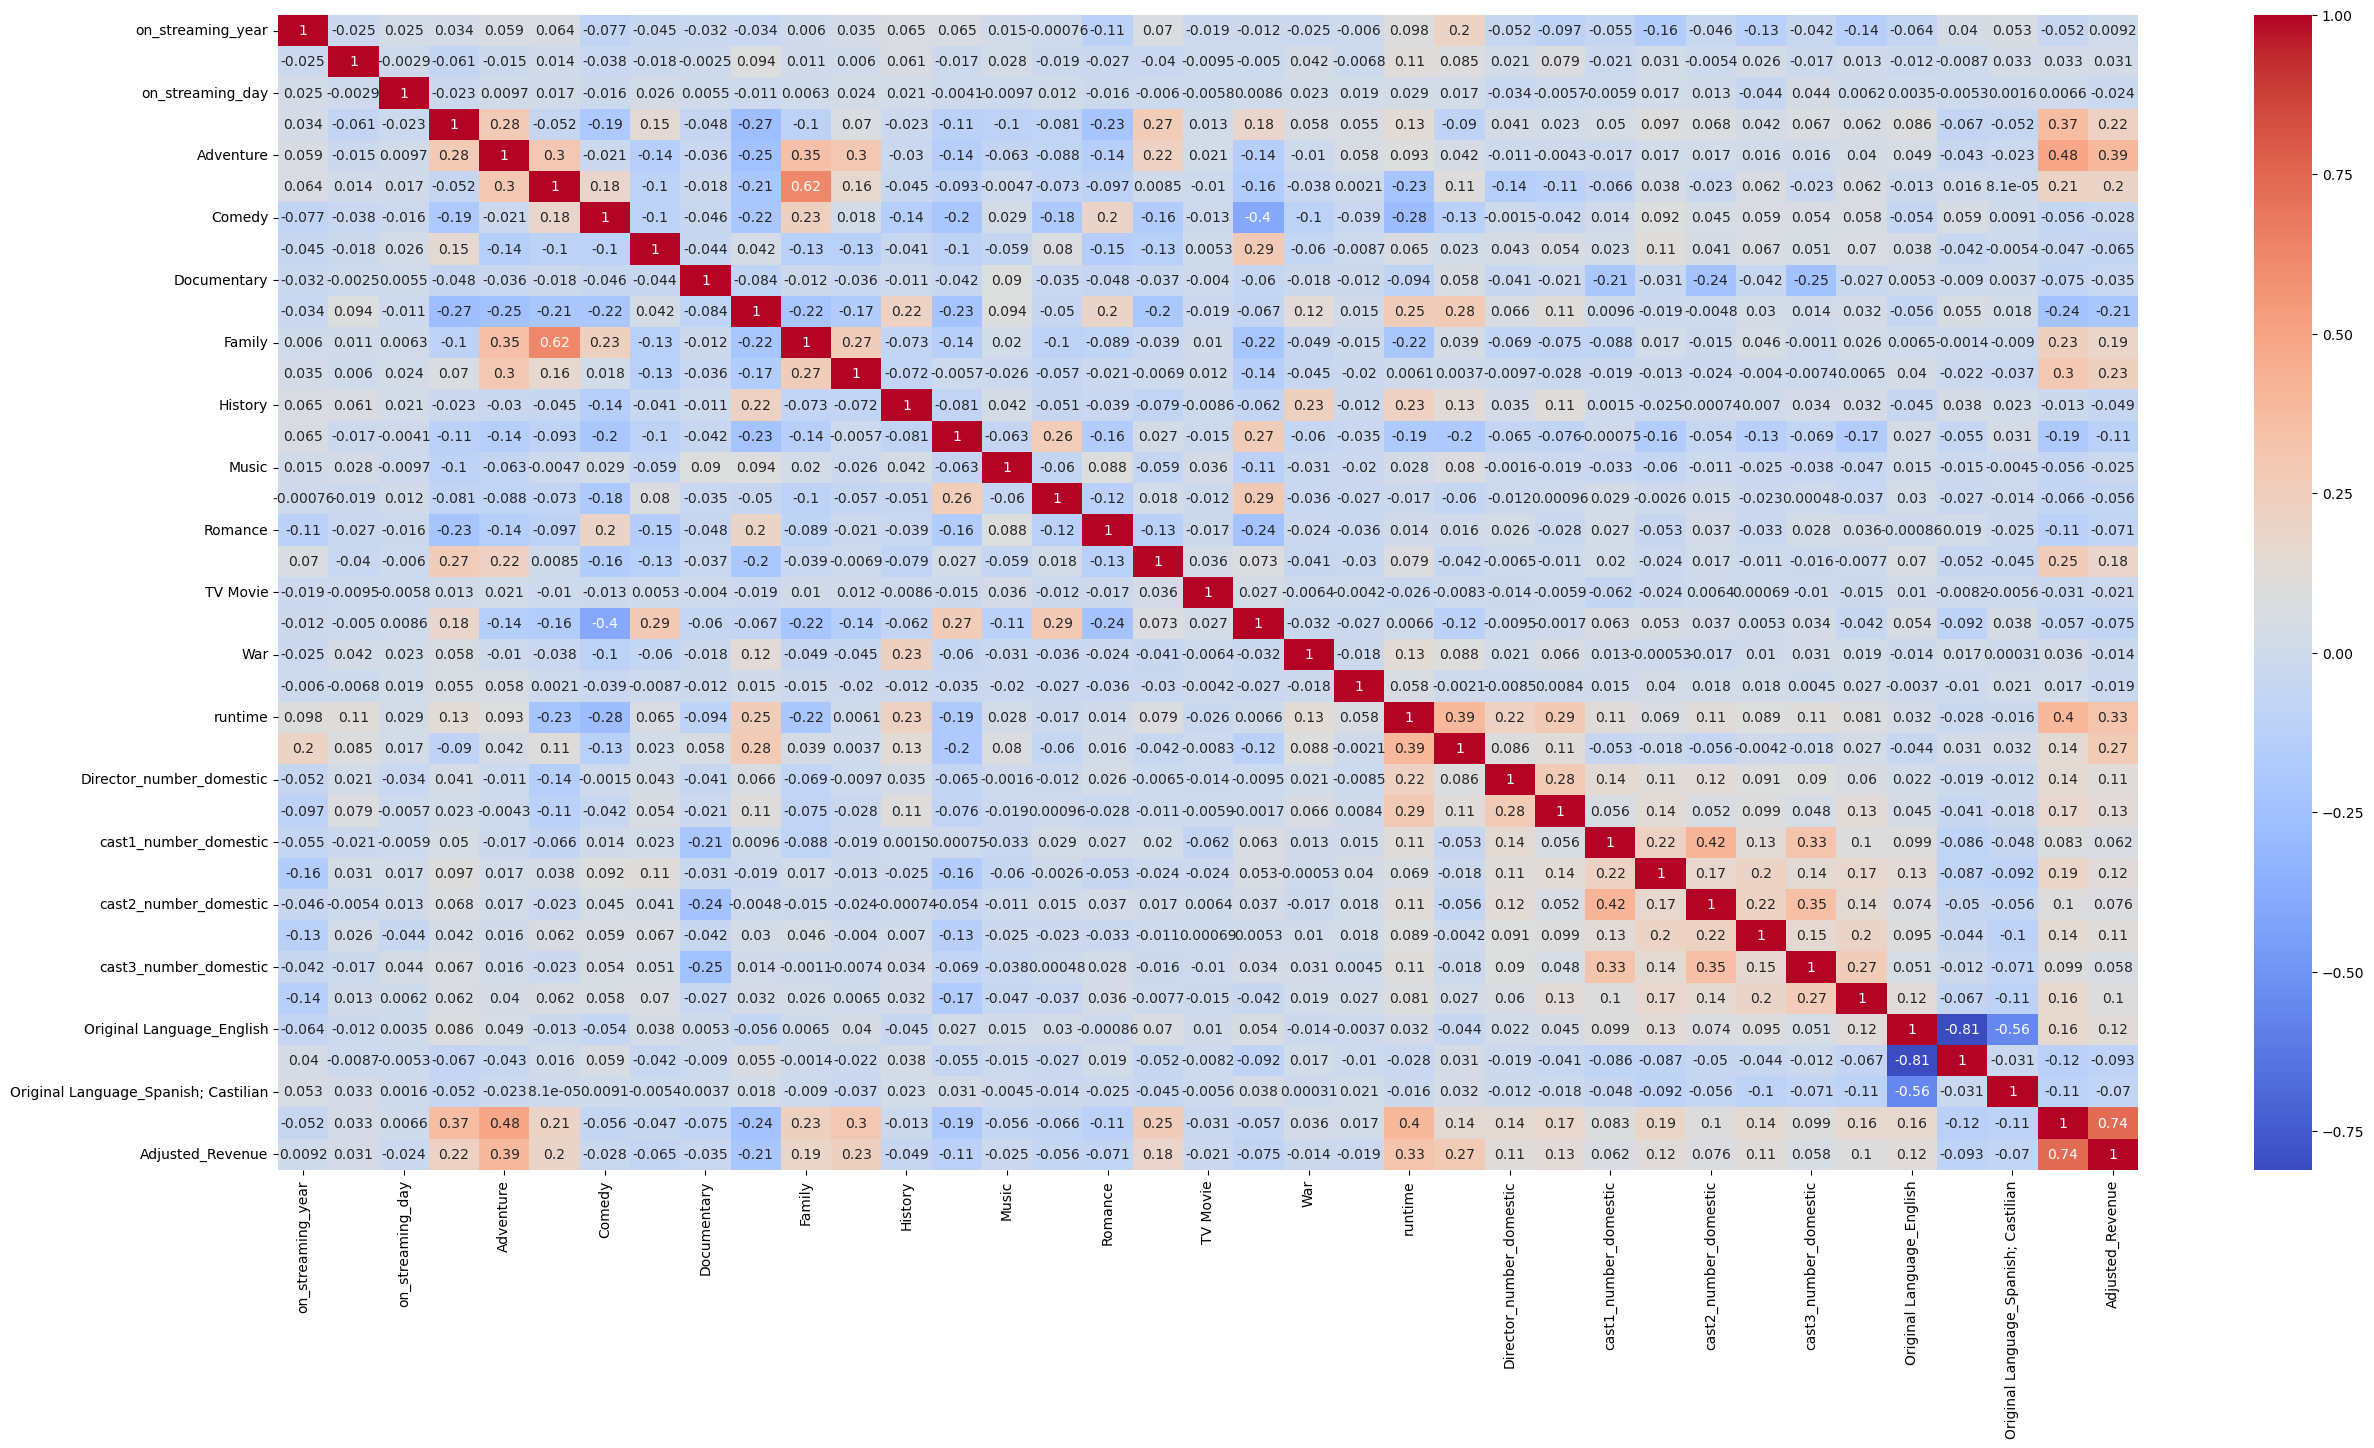

In [14]:
data = model.drop(columns=['id'])
normalized_data = (data - data.mean()) / data.std()
ax = sns.heatmap(normalized_data.corr(), annot=True, cmap='coolwarm')
fig = plt.gcf()
fig.set_size_inches(30, 15)
plt.show()

In [15]:
list_results = []

In [16]:
X = model.drop(columns=['Adjusted_Revenue','id','rating'])
X

,on_streaming_year,on_streaming_month,on_streaming_day,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,...,cast1_number_domestic,cast1_known_credits,cast2_number_domestic,cast2_known_credits,cast3_number_domestic,cast3_known_credits,Original Language_English,Original Language_French,Original Language_Spanish; Castilian,Adjusted_Budget
0,2005,9,22,0,0,0,0,1,0,1,...,8,66,8,140,8,126,1,0,0,42649200.0
1,2002,8,23,0,0,0,1,0,0,0,...,8,73,8,59,8,126,1,0,0,48609800.0
2,2008,1,11,1,1,0,0,0,0,1,...,8,66,8,140,8,40,1,0,0,88980000.0
3,2001,10,5,0,0,0,0,0,0,1,...,8,52,8,94,8,40,1,0,0,39293200.0
4,2007,12,24,0,0,0,0,1,0,0,...,8,125,8,84,8,40,1,0,0,45456000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3433,2009,10,16,1,0,0,1,0,0,0,...,8,108,8,60,8,72,1,0,0,4207320.0
3434,2007,1,31,0,0,0,0,0,0,1,...,8,15,8,20,8,33,1,0,0,757600.0
3435,2018,10,26,0,0,0,0,0,0,0,...,8,13,0,3,8,21,0,0,1,8127.0
3436,2003,9,3,0,0,0,0,1,0,1,...,5,8,0,2,0,1,1,0,0,32880.0


## dự đoán doanh thu

In [17]:
y = model['Adjusted_Revenue']
sc = StandardScaler()
X= sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
def models(funs,name):
    funs.fit(X_train,y_train)
    y_pred = funs.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f'R Squared Score of {name}: {r2 * 100:.2f}%')
    print(f'Mean Absolute Error of {name}: {mae :.2f}')
    print(f'Mean Squared Error of {name}: {mse:.2f}')
    print(f'Root Mean Squared Error of {name}: {rmse:.2f}')
    dicts = {'Outcome': 'Revenue', 'Model': name,'R Squared Score':r2,'Mean Absolute Error': mae,
             'Mean Squared Error':mse,'Root Mean Squared Error': rmse}
    list_results.append(dicts)
    return dicts

In [19]:
xgb_r = XGBRegressor()
dict_xgb = models(xgb_r,'XGB Regressor')

R Squared Score of XGB Regressor: 60.46%
Mean Absolute Error of XGB Regressor: 92369947.94
Mean Squared Error of XGB Regressor: 26051711982136256.00
Root Mean Squared Error of XGB Regressor: 161405427.36


In [20]:
lr = LinearRegression()
dict_lr = models(lr,'Linear Regression')

R Squared Score of Linear Regression: 57.02%
Mean Absolute Error of Linear Regression: 99752650.39
Mean Squared Error of Linear Regression: 28321437976000796.00
Root Mean Squared Error of Linear Regression: 168289744.12


In [21]:
rfr = RandomForestRegressor()
dict_rfr = models(rfr,'Random Forest Regressor')

R Squared Score of Random Forest Regressor: 63.06%
Mean Absolute Error of Random Forest Regressor: 90993132.13
Mean Squared Error of Random Forest Regressor: 24342707223416272.00
Root Mean Squared Error of Random Forest Regressor: 156021496.03


In [22]:
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
pickle.dump(rfr, open('revenue.pkl', 'wb'))

## dự đoán rating

In [23]:
y_r = model['rating']
sc = StandardScaler()
X= sc.fit_transform(X)
X_train, X_test, y_r_train, y_r_test = train_test_split(X, y_r, test_size=0.2, random_state=0)

In [24]:
def models(funs,name):
    funs.fit(X_train,y_r_train)
    y_r_pred = funs.predict(X_test)
    r2 = r2_score(y_r_test, y_r_pred)
    mae = mean_absolute_error(y_r_test, y_r_pred)
    mse = mean_squared_error(y_r_test, y_r_pred)
    rmse = np.sqrt(mse)
    print(f'R Squared Score of {name}: {r2 * 100:.2f}%')
    print(f'Mean Absolute Error of {name}: {mae :.4f}')
    print(f'Mean Squared Error of {name}: {mse:.4f}')
    print(f'Root Mean Squared Error of {name}: {rmse:.4f}')
    dicts = {'Outcome': 'Rating', 'Model': name,'R Squared Score':r2,'Mean Absolute Error': mae,
             'Mean Squared Error':mse,'Root Mean Squared Error': rmse}
    list_results.append(dicts)
    return dicts


In [25]:
xgb_r = XGBRegressor()
dict_xgb = models(xgb_r,'XGB Regressor')

R Squared Score of XGB Regressor: 19.96%
Mean Absolute Error of XGB Regressor: 5.6178
Mean Squared Error of XGB Regressor: 53.7768
Root Mean Squared Error of XGB Regressor: 7.3333


In [26]:
lr = LinearRegression()
dict_lr = models(lr,'Linear Regression')

R Squared Score of Linear Regression: 31.78%
Mean Absolute Error of Linear Regression: 5.2386
Mean Squared Error of Linear Regression: 45.8363
Root Mean Squared Error of Linear Regression: 6.7703


In [27]:
rfr = RandomForestRegressor()
dict_rfr = models(rfr,'Random Forest Regressor')

R Squared Score of Random Forest Regressor: 29.08%
Mean Absolute Error of Random Forest Regressor: 5.3227
Mean Squared Error of Random Forest Regressor: 47.6484
Root Mean Squared Error of Random Forest Regressor: 6.9028


In [28]:
lr = LinearRegression()
lr.fit(X_train,y_r_train)
pickle.dump(rfr, open('rating.pkl', 'wb'))

In [29]:
df=pd.DataFrame(list_results)
df

,Outcome,Model,R Squared Score,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
0,Revenue,XGB Regressor,0.604627,9.236995e+07,2.605171e+16,1.614054e+08
1,Revenue,Linear Regression,0.570181,9.975265e+07,2.832144e+16,1.682897e+08
2,Revenue,Random Forest Regressor,0.630564,9.099313e+07,2.434271e+16,1.560215e+08
3,Rating,XGB Regressor,0.199596,5.617850e+00,5.377677e+01,7.333265e+00
4,Rating,Linear Regression,0.317781,5.238582e+00,4.583631e+01,6.770252e+00
5,Rating,Random Forest Regressor,0.290810,5.322747e+00,4.764836e+01,6.902779e+00


## Dự đoán giá trị cụ thể

#### Dự đoán thành công bộ phim dựa vào doanh thu và điểm trung bình bằng cách:
    - Doanh thu > ngân sách --> Dự đoán doanh thu dựa trên mô hình Random Forest Regressor
    - Rating > trung bình thể loại --> DỰ đoán rating dựa trên mô hình Random Forest Regressor
    

In [30]:
X = model.drop(columns=['Adjusted_Revenue','id','rating'])
z=X.describe()
z

,on_streaming_year,on_streaming_month,on_streaming_day,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,...,cast1_number_domestic,cast1_known_credits,cast2_number_domestic,cast2_known_credits,cast3_number_domestic,cast3_known_credits,Original Language_English,Original Language_French,Original Language_Spanish; Castilian,Adjusted_Budget
count,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000,...,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000,3438.00000,3438.000000,3.438000e+03
mean,2010.897324,6.845259,15.893543,0.248691,0.184991,0.068354,0.367365,0.150087,0.011053,0.445899,...,7.873473,99.301920,7.810937,84.491856,7.751891,81.259744,0.935137,0.04363,0.021233,5.420756e+07
std,6.189961,3.409057,8.580059,0.432317,0.388347,0.252389,0.482157,0.357209,0.104566,0.497137,...,0.911881,61.463645,1.127732,61.561140,1.283199,56.274854,0.246320,0.20430,0.144182,6.359645e+07
min,2000.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.00000,0.000000,6.127000e+00
25%,2006.000000,4.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,8.000000,54.000000,8.000000,43.000000,8.000000,40.000000,1.000000,0.00000,0.000000,1.193200e+07
50%,2011.000000,7.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,8.000000,90.000000,8.000000,75.000000,8.000000,71.000000,1.000000,0.00000,0.000000,3.030400e+07
75%,2016.000000,10.000000,23.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,8.000000,132.000000,8.000000,113.000000,8.000000,111.000000,1.000000,0.00000,0.000000,7.074490e+07
max,2023.000000,12.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,8.000000,404.000000,8.000000,1585.000000,8.000000,647.000000,1.000000,1.00000,1.000000,5.254456e+08


In [31]:
list_means=[]
for col in dummy_df.columns:
    m = movies[movies[col]==1].rating.mean()
    dicts = {'Genre':col,'Mean':m}
    list_means.append(dicts)
mean_genre = pd.DataFrame(list_means)
mean_genre = mean_genre.set_index('Genre').T
mean_genre

Genre,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
Mean,62.499415,64.47956,66.92766,62.425178,64.217054,68.210526,66.26484,64.647355,63.855153,68.5,59.726087,67.283186,62.279279,64.053601,62.803191,62.0,62.26087,68.053763,63.609756


In [32]:
TL = ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
      'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']
language = ['English', 'French', 'Spanish; Castilian']

In [33]:
def TEST(test,z):
    listtest=[]
    dict_test={}
    for k in test:
        if k == 'On_streaming':
            test[k] = pd.to_datetime(test[k])
            dict_test['on_streaming_day'] = (test[k].day-z['on_streaming_day'][1])/z['on_streaming_day'][2]
            dict_test['on_streaming_month'] = (test[k].month-z['on_streaming_month'][1])/z['on_streaming_month'][2]
            dict_test['on_streaming_year'] = (test[k].year-z['on_streaming_year'][1])/z['on_streaming_year'][2]
        elif k == 'Runtime':
            if 'h' not in test[k]:
                hours = '0'
                minutes = test[k]
            else:
                hours, minutes = test[k].split('h')
                minutes = minutes[:-1].strip()
            total_minutes = int(hours) * 60 + int(minutes)
            dict_test['runtime'] = (total_minutes-z['runtime'][1])/z['runtime'][2]
        elif k == 'Budget':
            year = pd.to_datetime(test['On_streaming']).year 
            Adjusted = ((((2023-year)*0.0322)+1)*test[k])
            dict_test['Adjusted_Budget'] = (Adjusted-z['Adjusted_Budget'][1])/z['Adjusted_Budget'][2]
        elif k == 'Genre':
            genres = test[k].split(',')
            genres = [genre.strip() for genre in genres]
            for i in genres:
                if i in TL:
                    dict_test[i] = (1-z[i][1])/z[i][2]
            diff_genres = list(set(TL) - set(genres))
            for i in diff_genres:
                dict_test[i] = (0-z[i][1])/z[i][2]
        elif k == 'Original Language':
            dict_test['Original Language_' + str(test[k])] = (1-z['Original Language_' + str(test[k])][1])/z['Original Language_' + str(test[k])][2]
            diff_lang = list(set(language) - set([test[k]]))
            for i in diff_lang:
                dict_test['Original Language_' + i] = (1-z['Original Language_' + i][1])/z['Original Language_' + i][2]
        elif k in ['Director','cast1','cast2','cast3']:
            num = casts[casts['title']==test[k]]['number_domestic']
            dict_test[str(k) + '_number_domestic'] = (1-z[str(k) + '_number_domestic'][1])/z[str(k) + '_number_domestic'][2] 
            credit = casts[casts['title']==test[k]]['Known Credits']
            dict_test[str(k) + '_known_credits'] = (1-z[str(k) + '_known_credits'][1])/z[str(k) + '_known_credits'][2]
    column_names = X.columns.tolist()
    sorted_keys = sorted(dict_test, key=lambda x: column_names.index(x))
    for key in sorted_keys:
        listtest.append(dict_test[key])
    user_input=np.array([listtest])
    return user_input, Adjusted

In [34]:
def result(dl,Adjusted):
    revenue_model = pickle.load(open('revenue.pkl', 'rb'))
    DT = revenue_model.predict(dl)[0]
    rating_model = pickle.load(open('rating.pkl', 'rb'))
    RA = rating_model.predict(dl)[0]
    genres = test['Genre'].split(',')
    genres = [genre.strip() for genre in genres]
    kq=[]
    if DT<Adjusted:
        kq1=0
    else:
        kq1=1
    for g in genres:
        if mean_genre[g][0]>RA:
            kq.append(0)
        else:
            kq.append(1)
    name = test['Title']
    print(f'Ngân sách đã điều chỉnh của phim {name} là {Adjusted:0.2f}$')
    print(f'Doanh thu dự đoán của phim {name} là {DT:0.2f}$')
    print(f'Điểm đánh giá dự đoán của phim {name} là {RA:0.2f}%')
    if (kq1==1) & (statistics.mode(kq)==1):
        print('Dự doán phim "'+name+'" sẽ thành công')
    else:
        print('Dự doán phim "'+name+'" sẽ không thành công')
    print(kq1,kq)

In [35]:
test={'Title':'Revolver',
      'On_streaming':'22/08/2024',
      'Genre':'Documentary,Drama, Family',
      'Runtime':'1h 40m',
      'Director':'Guy Ritchie',
      'cast1':'Jason Statham',
      'cast2':'Ray Liotta',
      'cast3':'Vincent Pastore',
      'Original Language':'English',
      'Budget':426448245694}
dl,Adjusted = TEST(test,z)
result(dl,Adjusted)

Ngân sách đã điều chỉnh của phim Revolver là 412716612182.65$
Doanh thu dự đoán của phim Revolver là 1107775165.05$
Điểm đánh giá dự đoán của phim Revolver là 72.83%
Dự doán phim "Revolver" sẽ không thành công
0 [1, 1, 1]


C:\Users\ntthu\AppData\Local\Temp\ipykernel_1824\1393671888.py:6: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  test[k] = pd.to_datetime(test[k])


In [36]:
test={'Title':'VietNam airline',
      'On_streaming':'20/10/2024',
      'Genre':'Action, Adventure, Animation, Comedy',
      'Runtime':'1h 25m',
      'Director':'Ken Kwapis',
      'cast1':'Ray Liotta',
      'cast2':'Vincent Pastore',
      'cast3':'Catherine Keener',
      'Original Language':'English',
      'Budget':80898000}
dl,Adjusted = TEST(test,z)
result(dl,Adjusted)

Ngân sách đã điều chỉnh của phim VietNam airline là 78293084.40$
Doanh thu dự đoán của phim VietNam airline là 249824168.07$
Điểm đánh giá dự đoán của phim VietNam airline là 71.56%
Dự doán phim "VietNam airline" sẽ thành công
1 [1, 1, 1, 1]


C:\Users\ntthu\AppData\Local\Temp\ipykernel_1824\1393671888.py:6: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  test[k] = pd.to_datetime(test[k])
